In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("7Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [6]:
df = df.drop('User ID', axis=1)

# 4.2 Encode Categorical Data ('Gender', 'Purchased')
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])       # Male = 1, Female = 0
df['Purchased'] = le.fit_transform(df['Purchased']) # Yes = 1, No = 0

In [7]:
X = df[['Gender', 'Age', 'EstimatedSalary']]  # Independent features
y = df['Purchased']                           # Target variable


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Feature Scaling Completed!")



✅ Feature Scaling Completed!


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)
print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")



Training Data Shape: (300, 3)
Testing Data Shape: (100, 3)


In [10]:
model = GaussianNB()
model.fit(X_train, y_train)
print("\n✅ Naïve Bayes Model Trained Successfully!")



✅ Naïve Bayes Model Trained Successfully!


In [11]:
y_pred = model.predict(X_test)

In [12]:
print("\n🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy * 100:.2f}%")



🔹 Confusion Matrix:
[[61  2]
 [ 5 32]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100


🎯 Model Accuracy: 93.00%


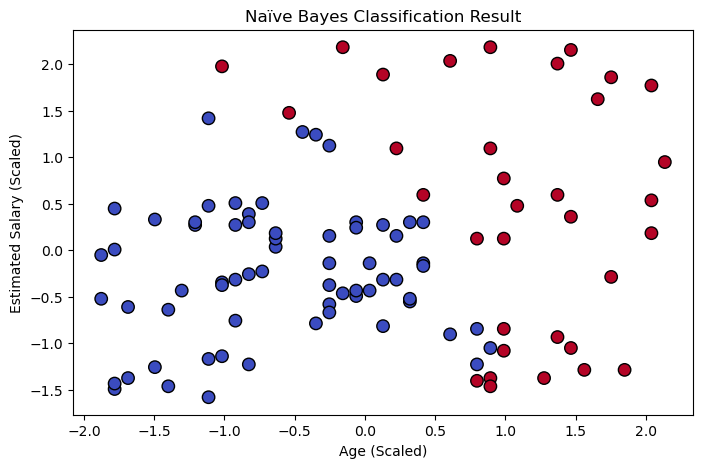

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 1], X_test[:, 2], c=y_pred, cmap='coolwarm', edgecolors='k', s=80)
plt.xlabel('Age (Scaled)')
plt.ylabel('Estimated Salary (Scaled)')
plt.title('Naïve Bayes Classification Result')
plt.show()

In [16]:
print("\n🔹 Test the Model for a Custom Input")
gender_input = input("Enter Gender (Male/Female): ").strip().lower()
age_input = int(input("Enter Age: "))
salary_input = int(input("Enter Estimated Salary: "))

# Encode and scale the input
gender_encoded = 1 if gender_input == "male" else 0
sample = np.array([[gender_encoded, age_input, salary_input]])
sample_scaled = scaler.transform(sample)

# Prediction
prediction = model.predict(sample_scaled)
if prediction[0] == 1:
    print("\n🟢 Prediction: Purchased (Yes)")
else:
    print("\n🔴 Prediction: Not Purchased (No)")


🔹 Test the Model for a Custom Input


Enter Gender (Male/Female):  Male
Enter Age:  21
Enter Estimated Salary:  3000000



🟢 Prediction: Purchased (Yes)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
